In [47]:
import geopandas as gpd
import pandas as pd
import numpy as np
import regionmask
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [48]:
soil = gpd.read_file("../data/soil/SoilParentMateriall_V1_portal1km.shp")

fig, ax = plt.subplots(figsize=(10, 8))
enwl_boundary.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth=1, label="Electricity North West Boundary")
enwl_ug_outages.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='-', label="UG Cables", markersize=10)
flood_segment.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History Segment", alpha=0.5)

plt.title("Electricity North West Underground Cable Outages due to Flooding")
plt.legend()
plt.show()

DataSourceError: ../data/soil/SoilParentMateriall_V1_portal1km.shp: No such file or directory

/Users/neil/Documents/geospatial/geospatial-venv/lib/python3.13/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'Soil_Parent_Material_V1_1km.gpkg': 'Carbonate Content' (default), 'European Soil Bureau Description', 'Parent Material Grainsize', 'Soil_Depth', 'Soil Group', 'Soil Texture', 'layer_styles'. Specify layer parameter to avoid this warning.
  result = read_func(


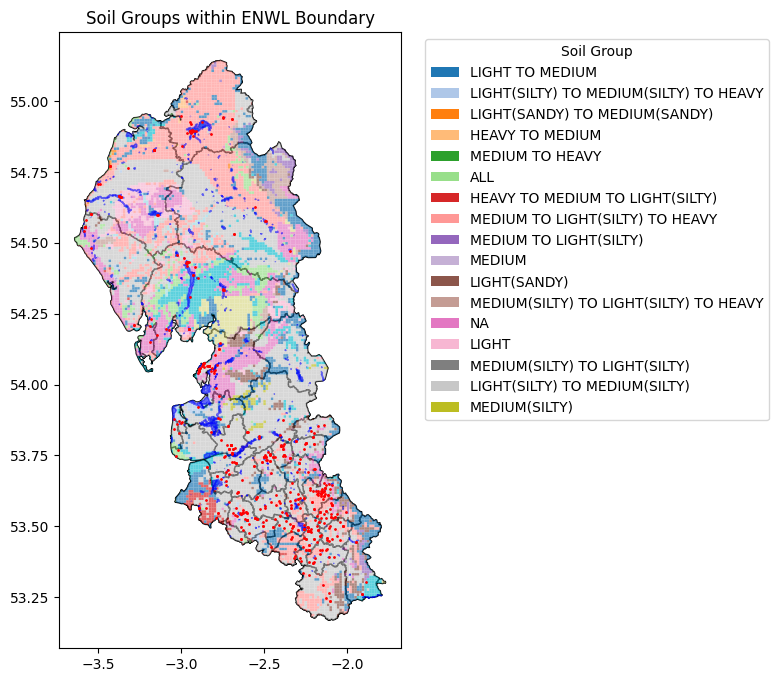

,ESB_DESC,CARB_CNTNT,PMM_GRAIN,SOIL_GROUP,SOIL_TEX,SOIL_DEPTH,PMM1K_UID,VERSION,geometry
0,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_1,DPSPM_V1_1km,"MULTIPOLYGON (((-7.67352 56.82004, -7.67379 56..."
1,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_2,DPSPM_V1_1km,"MULTIPOLYGON (((-7.67216 56.8111, -7.67243 56...."
2,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_3,DPSPM_V1_1km,"MULTIPOLYGON (((-7.67081 56.80216, -7.67108 56..."
3,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_4,DPSPM_V1_1km,"MULTIPOLYGON (((-7.66945 56.79322, -7.66972 56..."
4,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_5,DPSPM_V1_1km,"MULTIPOLYGON (((-7.6681 56.78428, -7.66837 56...."


In [ ]:
from matplotlib.patches import Patch

geology = gpd.read_file("../data/soil/Soil_Parent_Material_V1_1km.gpkg")

geology.head()

geology = geology.to_crs(enwl_boundary.crs)
geology_within_boundary = gpd.overlay(geology, enwl_boundary, how='intersection')
fig, ax = plt.subplots(figsize=(10, 8))
enwl_boundary.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label="ENWL Boundary")
geology_within_boundary.plot(ax=ax, column='SOIL_GROUP', cmap='tab20', legend=True, alpha=0.7)
flood_segment.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History Segment", alpha=0.5)
enwl_ug_outages.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='-', label="UG Cables", markersize=1)

plt.title("Soil Groups within ENWL Boundary")

soil_groups = geology_within_boundary['SOIL_GROUP'].unique()

cmap = plt.get_cmap('tab20')
color_lookup = {group: cmap(i % cmap.N) for i, group in enumerate(soil_groups)}

handles = [Patch(facecolor=color_lookup[group], label=group) for group in soil_groups]
plt.legend(handles=handles, title="Soil Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

geology.head()
